In [1]:
ytr§import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import glob
from datetime import datetime

In [2]:
import sklearn #A Machine Learning library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

/Users/shatirahman/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import warnings

In [4]:
df = pd.read_csv('/Users/shatirahman/Documents/kaggle.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [8]:
print('Alcoholism', df.Alcoholism.unique())
print('Handcap', df.Handcap.unique())
print('Diabetes', df.Diabetes.unique())
print('Hipertension', df.Hipertension.unique())

Alcoholism [0 1]
Handcap [0 1 2 3 4]
Diabetes [0 1]
Hipertension [1 0]


In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
df.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


In [11]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df[['AppointmentDay','ScheduledDay']].head(3)

,AppointmentDay,ScheduledDay
0,2016-04-29,2016-04-29 18:38:08
1,2016-04-29,2016-04-29 16:08:27
2,2016-04-29,2016-04-29 16:19:04


In [12]:
df["Month"]=df["AppointmentDay"].dt.month
month = df["Month"].unique()
month

array([4, 5, 6])

Text(0.5,1,'Total Number of Appointments per Month')

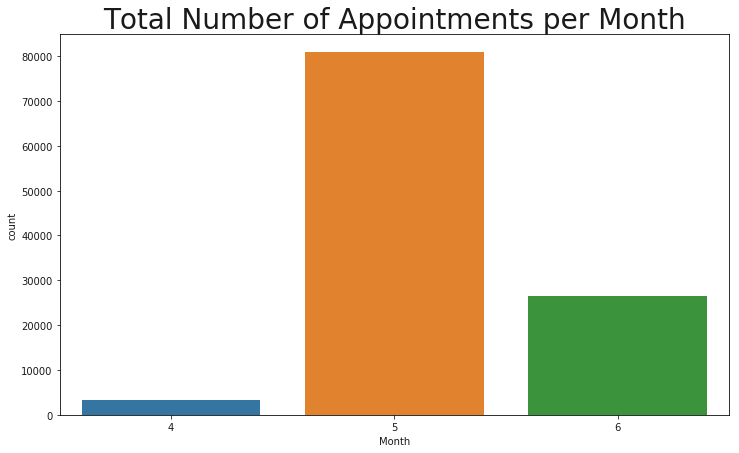

In [13]:
g=sns.countplot(x= 'Month',data = df, alpha=0.90)
g=sns.countplot(x= 'Month',data = df, alpha=0.90)
sns.set_color_codes("muted")
g.figure.set_size_inches(12,7)
g.axes.set_title('Total Number of Appointments per Month', fontsize = 28)

AxesSubplot(0.125,0.125;0.775x0.755)


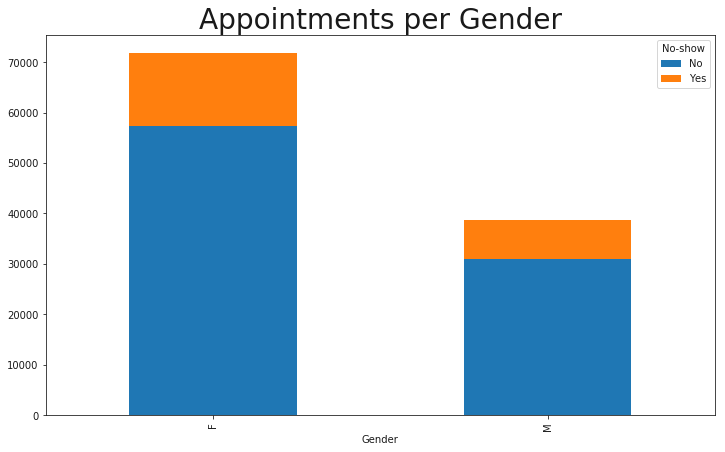

In [14]:
gbarplt=df.groupby(['Gender','No-show'])['No-show'].size()
gbarplt=df.groupby(['Gender','No-show'])['No-show'].size().unstack().plot(kind='bar',stacked=True)
gbarplt.figure.set_size_inches(12,7)
gbarplt.axes.set_title('Appointments per Gender', fontsize = 28)
print(gbarplt)

In [15]:
def FormatAge (age):
    if age['Age'] > 0 and age['Age'] < 14:
        return 'Children'
    elif age['Age'] >=14 and age['Age'] < 27:
        return 'Youth'
    elif age['Age'] >=27 and age['Age'] < 64:
        return 'Adults'
    else:
        return 'Senior'

Text(0.5,1,'Sms Received vs No-show')

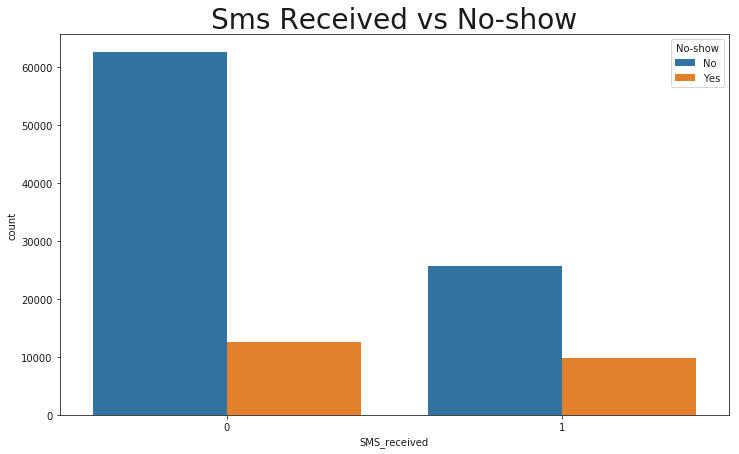

In [16]:
gbarplt= sns.countplot(x= 'SMS_received', hue = 'No-show', data = df)
sns.set_color_codes("muted")
gbarplt.figure.set_size_inches(12,7)
gbarplt.axes.set_title('Sms Received vs No-show', fontsize = 28)

/Users/shatirahman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

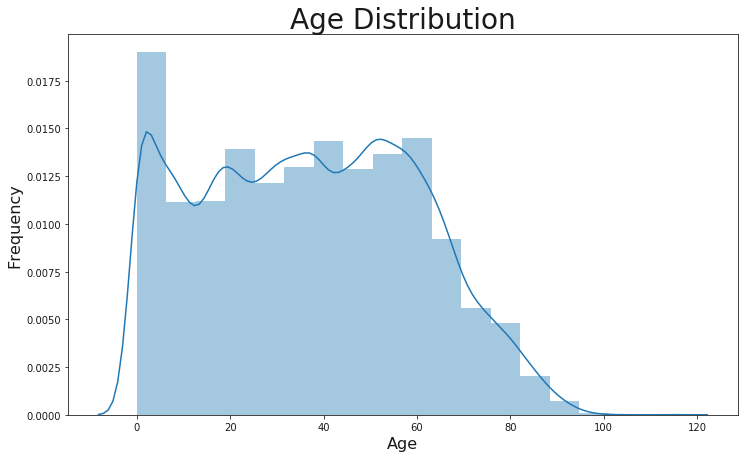

In [17]:
#Histogram distributuion
bins = np.linspace(0, 120, 20)
hist = sns.distplot(df.Age, bins=bins)
sns.set_color_codes("muted")
hist.set_xlabel('Age', size = 16)
hist.set_ylabel('Frequency', size = 16)
hist.figure.set_size_inches(12,7)
hist.axes.set_title('Age Distribution', fontsize = 28)

In [18]:
#Remove features which were created as part of the exploration step
df2=df.drop(["Month"],1)

In [19]:
#plotting same graph while removing outliers
# removing outliers, here yu will assume that any age below 0 months and  98 years are outliers

df = df[(df.Age >=0) & (df.Age <=95)]

print(df.Age)

0         62
1         56
2         62
3          8
4         56
5         76
6         23
7         39
8         21
9         19
10        30
11        29
12        22
13        28
14        54
15        15
16        50
17        40
18        30
19        46
20        30
21         4
22        13
23        46
24        65
25        46
26        45
27         4
28        51
29        32
          ..
110497    76
110498    59
110499    66
110500    59
110501    44
110502    22
110503    64
110504     4
110505    55
110506     5
110507     0
110508    59
110509    33
110510    64
110511    14
110512    41
110513     2
110514    58
110515    33
110516    37
110517    19
110518    50
110519    22
110520    42
110521    53
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110480, dtype: int64


In [20]:
min(df.Age)

0

/Users/shatirahman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

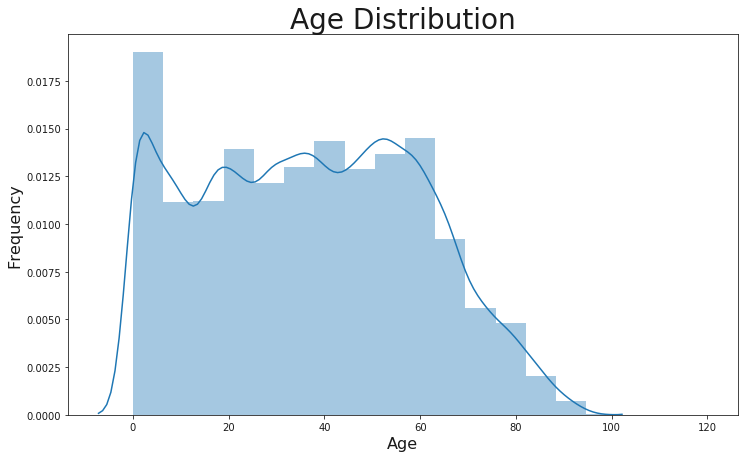

In [21]:
#Histogram distribution
bins = np.linspace(0, 120, 20)
hist = sns.distplot(df.Age, bins=bins)
sns.set_color_codes("muted")
hist.set_xlabel('Age', size = 16)
hist.set_ylabel('Frequency', size = 16)
hist.figure.set_size_inches(12,7)
hist.axes.set_title('Age Distribution', fontsize = 28)

Text(0.5,1,'Correlation between variables')

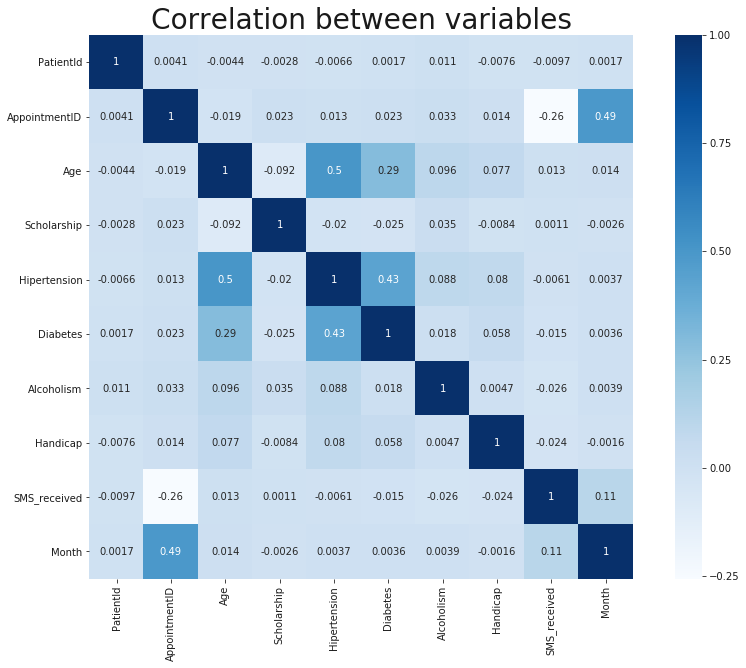

In [22]:
#Relationship between variables
correlation = df.corr()
plt.figure(figsize = (10,10))
corr = sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
corr.figure.set_size_inches(15,10)
plt.title("Correlation between variables", size = 28)


In [23]:
import datetime 
df['current'] = df['AppointmentDay'].dt.date
df['old'] = df['ScheduledDay'].dt.date
print(df['old'])


0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
5         2016-04-27
6         2016-04-27
7         2016-04-27
8         2016-04-29
9         2016-04-27
10        2016-04-27
11        2016-04-26
12        2016-04-28
13        2016-04-28
14        2016-04-28
15        2016-04-26
16        2016-04-28
17        2016-04-28
18        2016-04-26
19        2016-04-29
20        2016-04-27
21        2016-04-27
22        2016-04-25
23        2016-04-28
24        2016-04-29
25        2016-04-26
26        2016-04-29
27        2016-04-27
28        2016-04-29
29        2016-04-29
             ...    
110497    2016-06-01
110498    2016-06-08
110499    2016-06-01
110500    2016-06-08
110501    2016-06-01
110502    2016-06-08
110503    2016-06-01
110504    2016-06-08
110505    2016-06-01
110506    2016-06-01
110507    2016-06-08
110508    2016-06-01
110509    2016-06-08
110510    2016-06-01
110511    2016-06-08
110512    2016-06-08
110513    201

In [24]:
df['Lag'] = df['current'] - df['old']
print(df['Lag'])

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
5         2 days
6         2 days
7         2 days
8         0 days
9         2 days
10        2 days
11        3 days
12        1 days
13        1 days
14        1 days
15        3 days
16        1 days
17        1 days
18        3 days
19        0 days
20        2 days
21        2 days
22        4 days
23        1 days
24        0 days
25        3 days
26        0 days
27        2 days
28        0 days
29        0 days
           ...  
110497    0 days
110498    0 days
110499    0 days
110500    0 days
110501    0 days
110502    0 days
110503    0 days
110504    0 days
110505    0 days
110506    0 days
110507    0 days
110508    0 days
110509    0 days
110510    0 days
110511    0 days
110512    0 days
110513    0 days
110514    0 days
110515    2 days
110516    1 days
110517    0 days
110518   41 days
110519   41 days
110520   35 days
110521   35 days
110522   35 days
110523   35 days
110524   41 da

In [25]:
#checking if lag has been calculated accurately
df['Lag'].describe()

count                     110480
mean     10 days 04:24:21.375814
std      15 days 06:03:48.907110
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: Lag, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hipertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No-show           110480 non-null object
Month             110480 non-null int64
current           110480 non-null object
old               110480 non-null object
Lag               110480 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(9), object(5), timedelta64[ns](1)
memory usage: 16.0+ MB


In [27]:
#we see lag has a -6 days value that needs to be removed (this is clearly bad data)
# removing outliers, here that lag below 0 days is an outlier
#change lag to days(float64)
df['Lag']=df['Lag'].astype('timedelta64[D]')




In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hipertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No-show           110480 non-null object
Month             110480 non-null int64
current           110480 non-null object
old               110480 non-null object
Lag               110480 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(9), object(5)
memory usage: 16.0+ MB


In [29]:
df['Lag'].describe()

count    110480.000000
mean         10.183581
std          15.252649
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Lag, dtype: float64

In [30]:
#conver float64 to integer!
print(df['Lag'])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          2.0
6          2.0
7          2.0
8          0.0
9          2.0
10         2.0
11         3.0
12         1.0
13         1.0
14         1.0
15         3.0
16         1.0
17         1.0
18         3.0
19         0.0
20         2.0
21         2.0
22         4.0
23         1.0
24         0.0
25         3.0
26         0.0
27         2.0
28         0.0
29         0.0
          ... 
110497     0.0
110498     0.0
110499     0.0
110500     0.0
110501     0.0
110502     0.0
110503     0.0
110504     0.0
110505     0.0
110506     0.0
110507     0.0
110508     0.0
110509     0.0
110510     0.0
110511     0.0
110512     0.0
110513     0.0
110514     0.0
110515     2.0
110516     1.0
110517     0.0
110518    41.0
110519    41.0
110520    35.0
110521    35.0
110522    35.0
110523    35.0
110524    41.0
110525    41.0
110526    41.0
Name: Lag, Length: 110480, dtype: float64


In [31]:
df['Lag']= df.Lag.astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hipertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No-show           110480 non-null object
Month             110480 non-null int64
current           110480 non-null object
old               110480 non-null object
Lag               110480 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), object(5)
memory usage: 16.0+ MB


In [33]:
df = df[(df.Lag >= 0)]
print(df)

           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.990000e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.590000e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.260000e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.680000e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.840000e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.600000e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.340000e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.450000e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.640000e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.810000e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.350000e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.540000e+12        

Text(0.5,1,'Correlation of variables')

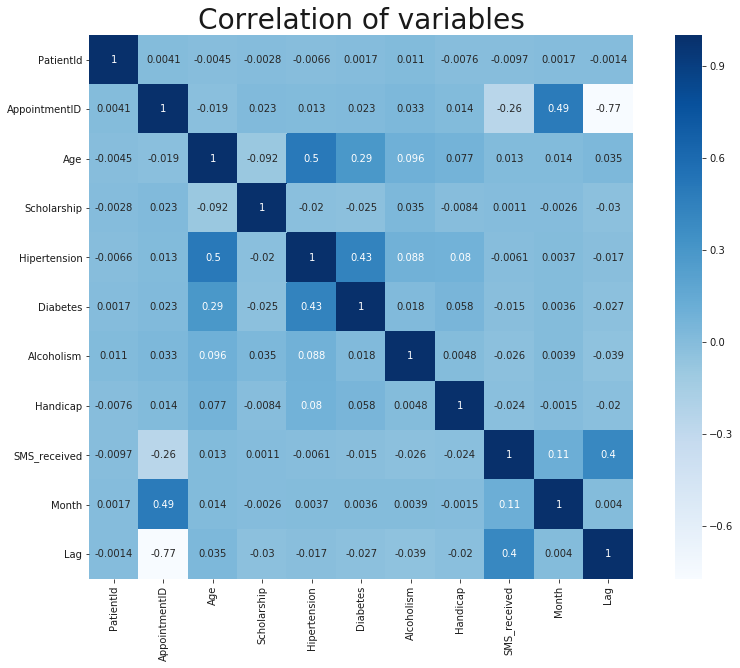

In [34]:
#Checking for indepency between variables
correlation = df.corr()
plt.figure(figsize = (10,10))
corr = sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
corr.figure.set_size_inches(15,10)
plt.title("Correlation of variables", size = 28)

In [35]:
print(df)



           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.990000e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.590000e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.260000e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.680000e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.840000e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.600000e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.340000e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.450000e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.640000e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.810000e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.350000e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.540000e+12        

In [36]:
df['AppointmentData'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

In [37]:
print(df)

           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.990000e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.590000e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.260000e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.680000e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.840000e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.600000e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.340000e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.450000e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.640000e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.810000e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.350000e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.540000e+12        

In [38]:
df['ScheduledData'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

In [39]:
print(df)

           PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.990000e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.590000e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.260000e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.680000e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.840000e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.600000e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.340000e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.450000e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.640000e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.810000e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.350000e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.540000e+12        

In [40]:
df2= df.drop(['PatientId', 'AppointmentID'], axis=1)

In [41]:
print(df2)

       Gender        ScheduledDay AppointmentDay  Age      Neighbourhood  \
0           F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1           M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2           F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3           F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4           F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   
5           F 2016-04-27 08:36:51     2016-04-29   76          REPÚBLICA   
6           F 2016-04-27 15:05:12     2016-04-29   23         GOIABEIRAS   
7           F 2016-04-27 15:39:58     2016-04-29   39         GOIABEIRAS   
8           F 2016-04-29 08:02:16     2016-04-29   21         ANDORINHAS   
9           F 2016-04-27 12:48:25     2016-04-29   19          CONQUISTA   
10          F 2016-04-27 14:58:11     2016-04-29   30     NOVA PALESTINA   
11          M 2016-04-26 08:44:12     2016-04-29   29     NOVA PALESTINA   
12          

In [42]:
df2['No-show'] = df2['No-show'].map({'Yes': 1, 'No': 0})

In [43]:
print(df2)

       Gender        ScheduledDay AppointmentDay  Age      Neighbourhood  \
0           F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1           M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2           F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3           F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4           F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   
5           F 2016-04-27 08:36:51     2016-04-29   76          REPÚBLICA   
6           F 2016-04-27 15:05:12     2016-04-29   23         GOIABEIRAS   
7           F 2016-04-27 15:39:58     2016-04-29   39         GOIABEIRAS   
8           F 2016-04-29 08:02:16     2016-04-29   21         ANDORINHAS   
9           F 2016-04-27 12:48:25     2016-04-29   19          CONQUISTA   
10          F 2016-04-27 14:58:11     2016-04-29   30     NOVA PALESTINA   
11          M 2016-04-26 08:44:12     2016-04-29   29     NOVA PALESTINA   
12          

In [44]:
#one hot encoding neighbourhood
df2['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [45]:
df2.sort_values('Neighbourhood')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Month,current,old,Lag,AppointmentData,ScheduledData
39615,F,2016-05-10 15:27:23,2016-05-12,58,AEROPORTO,0,0,0,0,0,0,0,5,2016-05-12,2016-05-10,2,Thursday,Tuesday
53971,M,2016-05-06 09:41:40,2016-05-06,51,AEROPORTO,0,0,0,0,0,0,0,5,2016-05-06,2016-05-06,0,Friday,Friday
109203,M,2016-06-06 08:12:05,2016-06-06,59,AEROPORTO,0,0,0,0,0,0,0,6,2016-06-06,2016-06-06,0,Monday,Monday
85556,M,2016-05-16 08:16:43,2016-06-02,62,AEROPORTO,0,1,0,0,0,1,0,6,2016-06-02,2016-05-16,17,Thursday,Monday
29321,F,2016-05-02 14:01:33,2016-05-09,58,AEROPORTO,0,0,0,0,0,0,0,5,2016-05-09,2016-05-02,7,Monday,Monday
84112,F,2016-06-03 08:01:28,2016-06-03,36,AEROPORTO,0,0,0,0,0,0,0,6,2016-06-03,2016-06-03,0,Friday,Friday
24987,F,2016-04-18 12:36:04,2016-05-05,37,AEROPORTO,0,0,0,0,0,0,1,5,2016-05-05,2016-04-18,17,Thursday,Monday
67179,F,2016-03-03 15:17:12,2016-05-17,64,AEROPORTO,0,1,0,0,0,0,0,5,2016-05-17,2016-03-03,75,Tuesday,Thursday
72476,F,2016-05-03 07:23:04,2016-05-03,42,ANDORINHAS,0,1,1,0,0,0,0,5,2016-05-03,2016-05-03,0,Tuesday,Tuesday
72025,F,2016-05-09 11:29:28,2016-05-12,0,ANDORINHAS,0,0,0,0,0,0,0,5,2016-05-12,2016-05-09,3,Thursday,Monday


In [46]:
df2= pd.get_dummies(df2, columns=["Neighbourhood"])

In [47]:
#recode gender, so males and females are numeric- using simple recoding

In [48]:
df2['Gender'] = df2['Gender'].map({'F': 0, 'M': 1})

In [49]:
print(df2['AppointmentData'])

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
5            Friday
6            Friday
7            Friday
8            Friday
9            Friday
10           Friday
11           Friday
12           Friday
13           Friday
14           Friday
15           Friday
16           Friday
17           Friday
18           Friday
19           Friday
20           Friday
21           Friday
22           Friday
23           Friday
24           Friday
25           Friday
26           Friday
27           Friday
28           Friday
29           Friday
            ...    
110497    Wednesday
110498    Wednesday
110499    Wednesday
110500    Wednesday
110501    Wednesday
110502    Wednesday
110503    Wednesday
110504    Wednesday
110505    Wednesday
110506    Wednesday
110507    Wednesday
110508    Wednesday
110509    Wednesday
110510    Wednesday
110511    Wednesday
110512    Wednesday
110513    Wednesday
110514    Wednesday
110515    Wednesday


In [50]:
df2.columns.values

array(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'Month', 'current', 'old', 'Lag',
       'AppointmentData', 'ScheduledData', 'Neighbourhood_AEROPORTO',
       'Neighbourhood_ANDORINHAS', 'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FOR

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110526
Data columns (total 98 columns):
Gender                                       110475 non-null int64
ScheduledDay                                 110475 non-null datetime64[ns]
AppointmentDay                               110475 non-null datetime64[ns]
Age                                          110475 non-null int64
Scholarship                                  110475 non-null int64
Hipertension                                 110475 non-null int64
Diabetes                                     110475 non-null int64
Alcoholism                                   110475 non-null int64
Handicap                                     110475 non-null int64
SMS_received                                 110475 non-null int64
No-show                                      110475 non-null int64
Month                                        110475 non-null int64
current                                      110475 non-null object

In [52]:
#one hot encode month
df2= pd.get_dummies(df2, columns=["Month"])

In [53]:
#one hot encode day of the week for appointment day- known as appointment data
df2= pd.get_dummies(df2, columns=["AppointmentData"])

In [54]:
#one hot encode day of the week for scheduled day-known as scheduled data
df2=pd.get_dummies(df2, columns=['ScheduledData'])

In [55]:
print(df2)

        Gender        ScheduledDay AppointmentDay  Age  Scholarship  \
0            0 2016-04-29 18:38:08     2016-04-29   62            0   
1            1 2016-04-29 16:08:27     2016-04-29   56            0   
2            0 2016-04-29 16:19:04     2016-04-29   62            0   
3            0 2016-04-29 17:29:31     2016-04-29    8            0   
4            0 2016-04-29 16:07:23     2016-04-29   56            0   
5            0 2016-04-27 08:36:51     2016-04-29   76            0   
6            0 2016-04-27 15:05:12     2016-04-29   23            0   
7            0 2016-04-27 15:39:58     2016-04-29   39            0   
8            0 2016-04-29 08:02:16     2016-04-29   21            0   
9            0 2016-04-27 12:48:25     2016-04-29   19            0   
10           0 2016-04-27 14:58:11     2016-04-29   30            0   
11           1 2016-04-26 08:44:12     2016-04-29   29            0   
12           0 2016-04-28 11:33:51     2016-04-29   22            1   
13    

In [56]:
#logistic regression part!

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110526
Columns: 110 entries, Gender to ScheduledData_Wednesday
dtypes: datetime64[ns](2), int64(10), object(2), uint8(96)
memory usage: 22.8+ MB


In [58]:
#set training and split and then do log reg, and then cross validation!
dfx=df2.drop(['No-show', 'AppointmentDay','ScheduledDay','current', 'old',], axis=1)
dfy=df2['No-show']
X_train, X_test, y_train,y_test=train_test_split(dfx, dfy, test_size=0.2, random_state=42)

In [59]:
#fit logistic regression on training set without parameters
#what I had used before model=LogistiRegression()
model = LogisticRegression(C=1e50, class_weight="balanced", solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1e+50, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [60]:
model.coef_

array([[-1.71827778e-02, -6.44504991e-03,  1.83746822e-01,
        -8.60806205e-02,  1.22184423e-01,  1.49908486e-01,
         6.68527876e-02,  4.09720793e-01,  3.00218105e-02,
         4.78385005e-02,  2.02531522e-01, -3.52672397e-01,
         2.32859833e-01,  2.77599443e-01,  1.45669314e-01,
         2.64444862e-01, -1.12363466e-01, -6.42781374e-03,
         2.30289624e-01,  8.57936503e-02,  8.03177777e-03,
        -3.19886130e-02, -1.36262063e-01, -3.07708826e-02,
         7.55609595e-02, -3.96993299e-01, -4.06645439e-01,
         1.02938506e-01, -2.73117940e-01, -4.05485659e-02,
         1.26264356e-01, -9.73886347e-02, -4.41997252e-02,
        -1.83073218e-01,  4.47595826e-02,  1.96378642e-01,
         2.21659593e-01,  3.01684039e-01,  2.67909759e-01,
        -2.06031361e-01, -1.66478067e+00,  2.94185228e-01,
         3.22323454e-01,  1.69386681e+00,  3.97935955e-02,
         3.09574240e-01, -3.08557125e-01, -2.94502690e-01,
        -2.22335320e-01,  1.52162308e-01, -2.59004405e-0

In [61]:
list(zip(dfx.columns, np.exp(model.coef_[0,:])))

[('Gender', 0.9829640042534679),
 ('Age', 0.9935756748739144),
 ('Scholarship', 1.2017115375600813),
 ('Hipertension', 0.917520257278659),
 ('Diabetes', 1.129962473442336),
 ('Alcoholism', 1.1617279230571387),
 ('Handicap', 1.0691380762034646),
 ('SMS_received', 1.5063971291398113),
 ('Lag', 1.030477008908868),
 ('Neighbourhood_AEROPORTO', 1.0490012284405028),
 ('Neighbourhood_ANDORINHAS', 1.224498683678524),
 ('Neighbourhood_ANTÔNIO HONÓRIO', 0.7028073974043989),
 ('Neighbourhood_ARIOVALDO FAVALESSA', 1.2622045472892705),
 ('Neighbourhood_BARRO VERMELHO', 1.3199573732052559),
 ('Neighbourhood_BELA VISTA', 1.156813582737056),
 ('Neighbourhood_BENTO FERREIRA', 1.3027075919975957),
 ('Neighbourhood_BOA VISTA', 0.8937193617238934),
 ('Neighbourhood_BONFIM', 0.9935928004628269),
 ('Neighbourhood_CARATOÍRA', 1.2589645837895225),
 ('Neighbourhood_CENTRO', 1.089581470281014),
 ('Neighbourhood_COMDUSA', 1.0080641190212818),
 ('Neighbourhood_CONQUISTA', 0.9685176105427795),
 ('Neighbourhood_CON

In [62]:
model.intercept_

array([-0.36883139])

In [63]:
print(np.max(np.matmul(X_train, model.coef_.T) + model.intercept_))

5.249883234240346


In [64]:
X_train.dtypes

Gender                               int64
Age                                  int64
Scholarship                          int64
Hipertension                         int64
Diabetes                             int64
Alcoholism                           int64
Handicap                             int64
SMS_received                         int64
Lag                                  int64
Neighbourhood_AEROPORTO              uint8
Neighbourhood_ANDORINHAS             uint8
Neighbourhood_ANTÔNIO HONÓRIO        uint8
Neighbourhood_ARIOVALDO FAVALESSA    uint8
Neighbourhood_BARRO VERMELHO         uint8
Neighbourhood_BELA VISTA             uint8
Neighbourhood_BENTO FERREIRA         uint8
Neighbourhood_BOA VISTA              uint8
Neighbourhood_BONFIM                 uint8
Neighbourhood_CARATOÍRA              uint8
Neighbourhood_CENTRO                 uint8
Neighbourhood_COMDUSA                uint8
Neighbourhood_CONQUISTA              uint8
Neighbourhood_CONSOLAÇÃO             uint8
Neighbourho

In [65]:
X_train.head


<bound method NDFrame.head of         Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
51859        0   23            0             0         0           0   
3622         0   17            0             0         0           0   
110232       0    1            0             0         0           0   
79512        0   16            0             0         0           0   
11609        0   38            0             0         0           0   
7412         0   35            0             0         0           0   
101744       1   36            0             0         0           0   
80563        0   12            0             0         0           0   
58930        0   62            0             1         1           0   
27805        0   74            0             1         0           0   
5028         1   62            0             1         0           0   
93778        1    8            0             0         0           0   
96507        1   64            0  

In [66]:
#Logistic regression on the test set
predictions = model.predict(X_test)


In [67]:
#logistic regression on train set
predictions= model.predict(X_train)

In [68]:
#cross validate dataset
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics


In [69]:
scores = cross_val_score(model, X_train, y_train, cv=6)
print(scores)


[0.65209422 0.65379132 0.65553293 0.65118805 0.65428746 0.65829316]


In [70]:
sum(y_train)/len(y_train)

0.20147092102285585

In [71]:
# Use score method to get accuracy of model
score = model.score(X_train, y_train)
print(score)

0.6566191446028513


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [73]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[47480 23094]
 [ 7254 10552]]


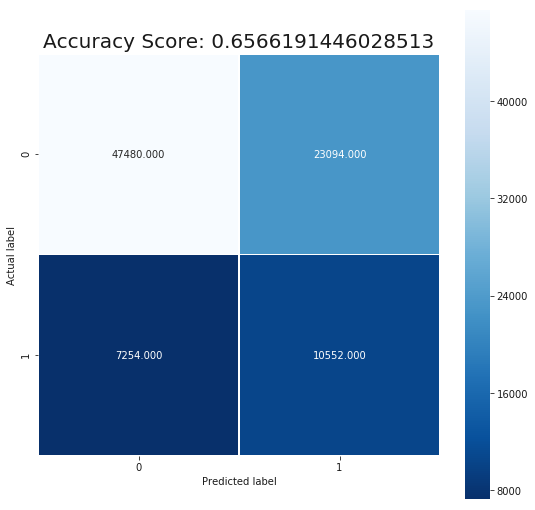

In [74]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 20);



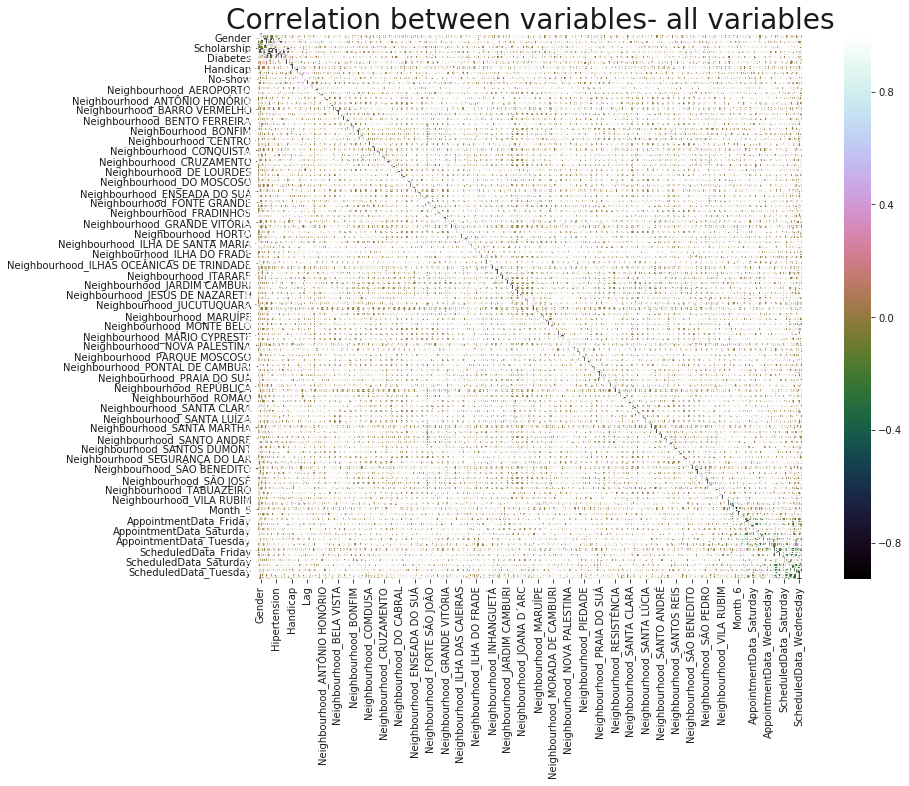

In [75]:
correlation = df2.corr()
plt.figure(figsize = (10,10))
corr = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
corr.figure.set_size_inches(15,10)
plt.title("Correlation between variables- all variables", size = 28)
plt.show()

In [76]:
##ROC Curve and AUC

In [77]:
#Compute predicted probabilities.

In [78]:
pred_probs = model.predict_proba(dfx)[:,1]

/Users/shatirahman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


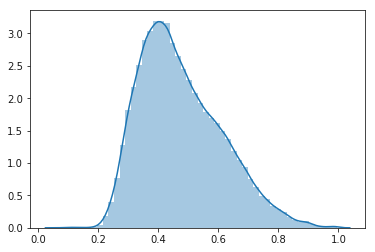

In [79]:
#visualise distribution
sns.distplot(pred_probs)

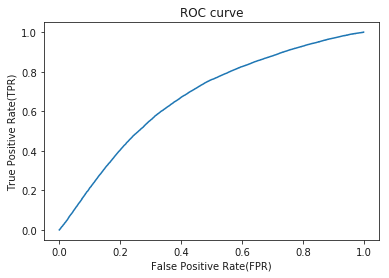

In [80]:
#plot roc curve
fpr, tpr, cutoffs = metrics.roc_curve(dfy, pred_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
matplotlib.rcParams.update({'font.size': 18})

In [81]:
#compute AUC under ROC curve
metrics.roc_auc_score(dfy, pred_probs)


0.6721588139173471

In [82]:
#cross validation gianluca campanella's way


In [83]:
from sklearn import linear_model as lm, metrics, model_selection as ms
#Define stratified folds.
cv = ms.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [84]:
#Compute average classification accuracy across folds.

estimator = lm.LogisticRegression(C=1e50, class_weight="balanced", solver="liblinear")
accuracies = ms.cross_val_score(estimator, dfx, dfy, scoring="accuracy", cv=cv)
np.mean(accuracies)

0.6543562467784193

In [85]:
#Compute average AUC across folds.
aucs = ms.cross_val_score(estimator, dfx, dfy, scoring="roc_auc", cv=cv)
np.mean(aucs)

0.6692831198391619

In [86]:
#regularization #don't really know what I am doing here

In [87]:
#Determine 'optimal' value of C by cross-validation using AUC scoring (scikit-learn uses $L_{2}$ regularisation by default).
gs = ms.GridSearchCV(estimator,
                     param_grid={"C": np.logspace(-4, 4, 11)},
                     scoring="roc_auc",
                     cv=cv)
gs.fit(dfx, dfy)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1e+50, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-04, 6.30957e-04, 3.98107e-03, 2.51189e-02, 1.58489e-01,
       1.00000e+00, 6.30957e+00, 3.98107e+01, 2.51189e+02, 1.58489e+03,
       1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [88]:
gs.best_score_

0.6722420671814155

In [89]:
gs.best_estimator_

LogisticRegression(C=0.003981071705534973, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

/Users/shatirahman/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


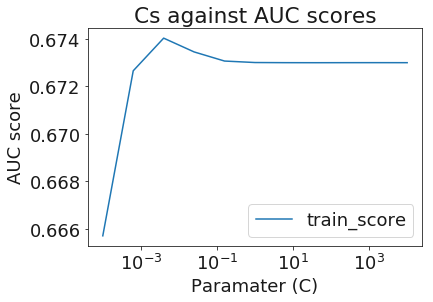

In [90]:
#Plot Cs against AUC scores.
cv_results = pd.DataFrame({**gs.param_grid,
                           **{"train_score": gs.cv_results_["mean_train_score"]}})
cv_results.plot(x="C", y="train_score", logx=True)
plt.title('Cs against AUC scores')
plt.xlabel('Paramater (C)')
plt.ylabel('AUC score')
matplotlib.rcParams.update({'font.size': 18})

In [91]:
cv_results

,C,train_score
0,0.000100,0.665695
1,0.000631,0.672644
2,0.003981,0.674019
3,0.025119,0.673439
4,0.158489,0.673054
5,1.000000,0.672992
6,6.309573,0.672986
7,39.810717,0.672984
8,251.188643,0.672986
9,1584.893192,0.672987


In [92]:
#getting rid of imbalance using gianluca's logistic regresion - gives me a different model

In [93]:
#from sklearn.preprocessing import StandardScaler
#features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
#x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
#x = StandardScaler().fit_transform(x)

In [94]:
#pca attempt

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
X = dfx 
y = dfy

In [97]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [99]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [100]:
explained_variance = pca.explained_variance_ratio_  
print(explained_variance)

[2.05990821e-02 1.84819900e-02 1.75625126e-02 1.67196839e-02
 1.57398611e-02 1.52918988e-02 1.42976040e-02 1.24660482e-02
 1.19258811e-02 1.12237043e-02 1.05501350e-02 1.04727178e-02
 1.02277802e-02 1.00254176e-02 9.94953861e-03 9.91575689e-03
 9.90151899e-03 9.86514191e-03 9.85307255e-03 9.79645443e-03
 9.78931079e-03 9.78732899e-03 9.78051635e-03 9.76800688e-03
 9.75117431e-03 9.74269208e-03 9.74117640e-03 9.72969941e-03
 9.71816679e-03 9.71489663e-03 9.70917070e-03 9.70349176e-03
 9.69702378e-03 9.68722797e-03 9.67866999e-03 9.67544219e-03
 9.67025096e-03 9.66449255e-03 9.66164763e-03 9.65072448e-03
 9.64610669e-03 9.64055163e-03 9.63371806e-03 9.62822844e-03
 9.62219547e-03 9.62013459e-03 9.61067227e-03 9.61012077e-03
 9.60358632e-03 9.60263221e-03 9.59821949e-03 9.59628620e-03
 9.59505897e-03 9.59187293e-03 9.58994226e-03 9.58924106e-03
 9.58252712e-03 9.58012377e-03 9.57615652e-03 9.57402201e-03
 9.57351098e-03 9.56850803e-03 9.56593030e-03 9.56559421e-03
 9.56329920e-03 9.561611

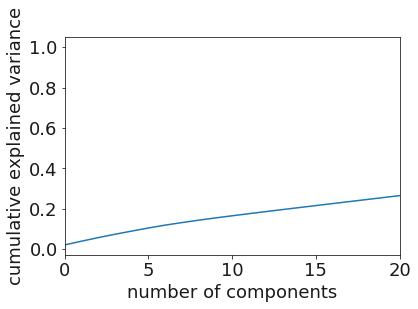

In [101]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0,20]);

In [102]:
#change the axis, to s

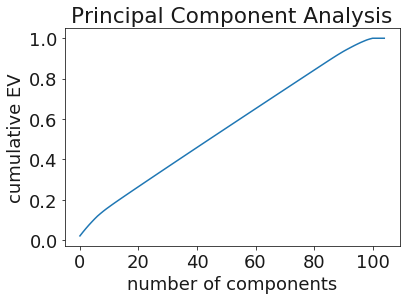

In [103]:
#trying to get some graphs (this code doesn't work)
pca = PCA().fit_transform(X_train)
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative EV')
plt.title('Principal Component Analysis');
matplotlib.rcParams.update({'font.size': 18})

In [104]:
#roc curve for test set

In [105]:
#roc curve for test set!!
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed'


SyntaxError: unexpected EOF while parsing (<ipython-input-105-2018774319de>, line 24)

In [106]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)



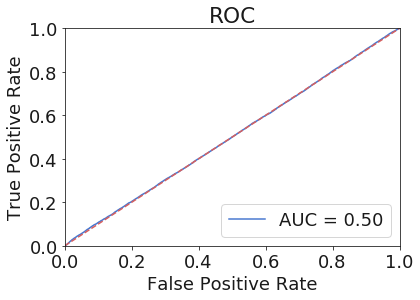

In [107]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
matplotlib.rcParams.update({'font.size': 18})
plt.show()